In [14]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm

from utils import *
from ODE_utils import *

import matplotlib as mpl
import pandas as pd
import multiprocessing

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16

In [23]:
# load the data for the community outcomes
R = 4
path_orig = "../data/ecol_adv_no_lag"
path = "../data/seq_vs_co_param"
rhos = np.linspace(0, 0.4, 51)
rhos_alt = []
# get the result for pairwise
all_frac_diaux_pair = []
D = 1000
gsigma = 0.075
frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"pairwise_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_orig, f"pairwise_rho={rho}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

D = 1000
gsigma = 0.2
frac_diaux_pair = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path, f"pairwise_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    basic = data["basic"]
    D, gC, Nseq, Ncout = basic["D"], basic["gC"], basic["Nseq"], basic["Ncout"]
    states = data["end"]["states"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux_pair.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
all_frac_diaux_pair.append(frac_diaux_pair)

all_frac_diaux = []
frac_diaux = []
divs = []
stratified = []
D = 1000
gsigma = 0.075
for rho in tqdm(rhos):
    if not os.path.exists(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl")):
        continue
    rhos_alt.append(rho)
    data = pickle.load(open(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    divs.append([min(4, len(i)) for i in ids])
    frac_diaux_strat = []
    lenlist = []
    for num in range(R):
        ids_list = sum([i for i in ids if len(i)==num+1], [])
        if(len(ids_list)>0):
            frac_diaux_strat.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
        else:
            frac_diaux_strat.append(0)
        lenlist.append([len(i) for i in ids].count(num+1))
    stratified.append([lenlist, frac_diaux_strat])
all_frac_diaux.append(frac_diaux)

frac_diaux = []
div = []
for rho in tqdm(rhos):
    data = pickle.load(open(os.path.join(path_orig, f"full_rho={rho}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    div.append(np.mean([len(i) for i in ids]))
all_frac_diaux.append(frac_diaux)

frac_diaux = []
D = 1000
gsigma = 0.2
for rho in tqdm(rhos):
    if not os.path.exists(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl")):
        continue
    data = pickle.load(open(os.path.join(path, f"full_rho={rho}_D={D}_gsigma={gsigma}.pkl"), "rb"))
    states = data["end"]["states"]
    Nseq = data["basic"]["Nseq"]
    ids = [i["ids"] for i in states]
    ids_list = sum(ids, [])
    frac_diaux.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
    divs.append([min(4, len(i)) for i in ids])
    frac_diaux_strat = []
    lenlist = []
    for num in range(R):
        ids_list = sum([i for i in ids if len(i)==num+1], [])
        if(len(ids_list)>0):
            frac_diaux_strat.append(len([i for i in ids_list if i<Nseq])/len(ids_list))
        else:
            frac_diaux_strat.append(0)
        lenlist.append([len(i) for i in ids].count(num+1))
    stratified.append([lenlist, frac_diaux_strat])
all_frac_diaux.append(frac_diaux)

100%|██████████| 51/51 [00:55<00:00,  1.09s/it]


[0.994328922495274, 0.9943820224719101, 0.996116504854369, 0.9923076923076923, 0.9830827067669173, 0.9866412213740458, 0.982, 0.9730769230769231, 0.9700374531835206, 0.94, 0.9336016096579477, 0.9173387096774194, 0.9051724137931034, 0.86875, 0.8394004282655246, 0.8343685300207039, 0.787746170678337, 0.7427884615384616, 0.7208237986270023, 0.676056338028169, 0.6119402985074627, 0.5585106382978723, 0.48517520215633425, 0.417910447761194, 0.3333333333333333, 0.3190789473684211, 0.2847682119205298, 0.25084745762711863, 0.21223021582733814, 0.1918819188191882, 0.12992125984251968, 0.1169811320754717, 0.11067193675889328, 0.072, 0.046218487394957986, 0.03333333333333333, 0.024691358024691357, 0.017094017094017096, 0.017167381974248927, 0.004166666666666667, 0.017241379310344827, 0.012195121951219513, 0.0041841004184100415, 0.004149377593360996, 0.00411522633744856, 0.004310344827586207, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9981203007518797, 1.0, 0.99616122840690

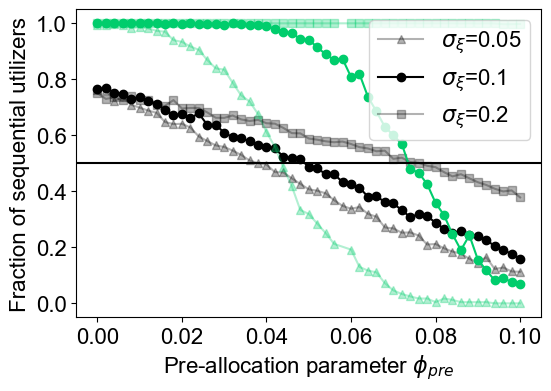

In [24]:
plt.rcParams["figure.figsize"] = (6,4)
alpha_list = [0.3, 1, 0.3]
shape_list = ['^', "o", "s"]
gs_list = ["0.05", "0.1", "0.2"]
# a datapt is corrupted
rhos_alt = np.hstack([rhos[:29], rhos[30:]])
rhos_list = [rhos_alt, rhos, rhos_alt]
for idx, frac_diaux_pair in enumerate(all_frac_diaux_pair):
    plt.plot([i/R for i in rhos], frac_diaux_pair[:len(rhos)], marker=shape_list[idx], c="k", alpha=alpha_list[idx], label=f"$\\sigma_\\xi$={gs_list[idx]}")
for idx, frac_diaux in enumerate(all_frac_diaux):
    print(frac_diaux)
    plt.plot([i/R for i in rhos_list[idx]], frac_diaux[:len(rhos_list[idx])], marker=shape_list[idx], c="#00CD6C", alpha=alpha_list[idx])
plt.axhline(0.5, c='k')
plt.legend(loc="upper right")
plt.xlabel("Pre-allocation parameter $\phi_{pre}$")
plt.ylabel("Fraction of sequential utilizers")
plt.savefig("../figures/div_vs_frac_diaux_gsigma.pdf", bbox_inches="tight")

In [22]:
len(all_frac_diaux[-1])

101